In [37]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd. read_csv('cars.csv')

In [39]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [47]:
df['cubicinches'] = pd.to_numeric(df['cubicinches'])
df['weightlbs'] = pd.to_numeric(df['weightlbs'].str.strip(), errors='coerce')

In [49]:
df.dtypes

mpg            float64
cylinders        int64
cubicinches    float64
hp               int64
weightlbs      float64
time-to-60       int64
year             int64
brand           object
dtype: object

In [70]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [72]:
df['cubicinches'].replace({" ":0}, inplace = True)

C:\Users\Arya\AppData\Local\Temp\ipykernel_16868\3371983805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cubicinches'].replace({" ":0}, inplace = True)


In [50]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [52]:
df['year'].unique()

array([1972, 1980, 1971, 1978, 1974, 1982, 1983, 1981, 1975, 1973, 1977,
       1976, 1979], dtype=int64)

1. Can you find that there is improvement in mpg over the years ?

Ans: There has been a significant improvement in mpg till the year 1981. however it has reduced in the susequesnt years.

<Axes: xlabel='year', ylabel='mpg'>

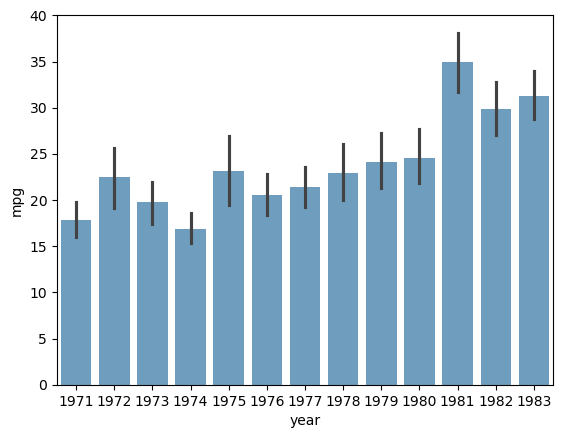

In [53]:
#yearwise_mpg = (df.groupby(' year'))
sns.barplot(x=df["year"], y=df["mpg"], alpha=0.7)

2.  Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?

Ans: Yes, there appears to be a negative linear relation between a vehicle's cubic inches and its time to reach 60. The time to 60 decreases with an increase in cubic inches.

<Axes: xlabel='cubicinches', ylabel='time-to-60'>

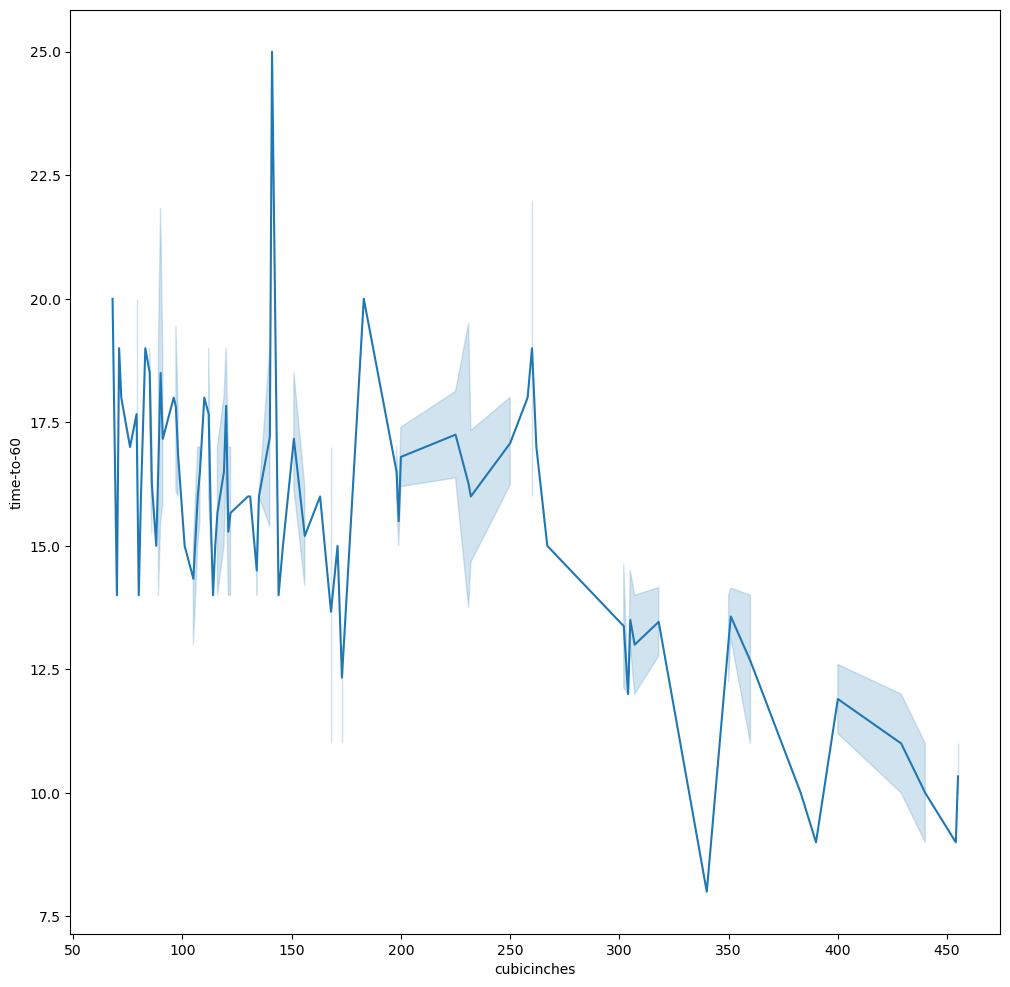

In [69]:
plt.figure(figsize=(12, 12))
#x1 = pd.DataFrame(df.groupby("cubicinches")["time-to-60"].sum()).reset_index()
sns.lineplot(x='cubicinches', y='time-to-60', data=df)

3. Does a specific country prefer vehicles with more horse power?


Ans: US prefers the vehicles with more horse power.

<Axes: xlabel='brand', ylabel='hp'>

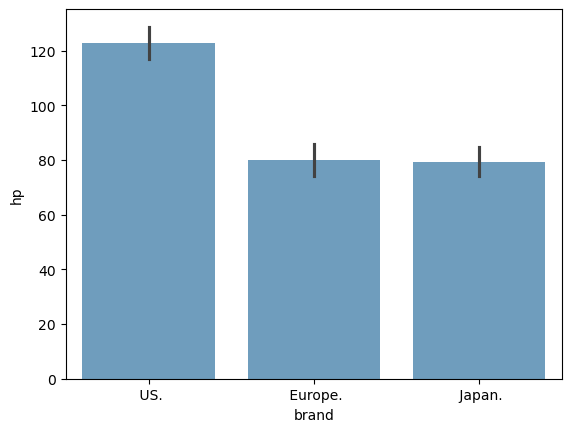

In [65]:
sns.barplot(x=df["brand"], y=df["hp"], alpha=0.7)

4. How does the horse power affects the average of the vehicle ?

Ans: It is observed that as hp increases, mpg decreses. there exists a negative linear relationship.

<Axes: xlabel='hp', ylabel='mpg'>

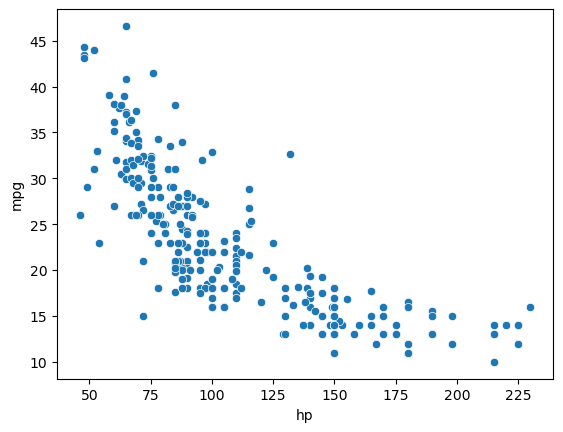

In [76]:
#x2 = pd.DataFrame(df.groupby("hp")["mpg"].sum()).reset_index()
sns.scatterplot(x='hp', y='mpg', data=df)

5. How does the cubic inches affects the average of the vehicle ?


Ans: Ans: It is observed that as cubic inches increases, mpg decreses. there exists a negative linear relationship.

<Axes: xlabel='cubicinches', ylabel='mpg'>

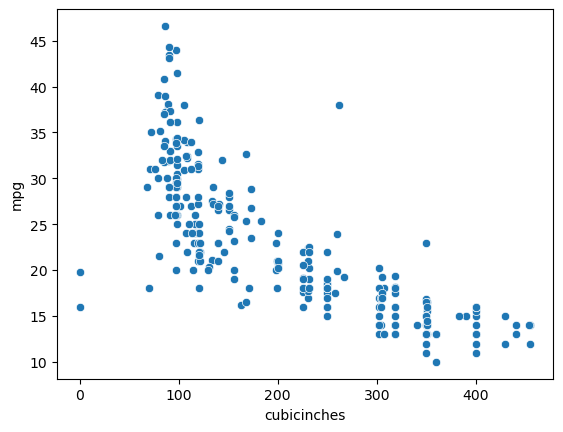

In [79]:
#x2 = pd.DataFrame(df.groupby("cubicinches")["mpg"].sum()).reset_index()
sns.scatterplot(x='cubicinches', y='mpg', data=df)

6. What is the effect of number of cylinders on the mpg ?


Ans: the vehicles seem to give great averages till 5 cylinders however the averges steeply reduce when more than 5 cylinders exist in the vehicle.

<Axes: xlabel='cylinders', ylabel='mpg'>

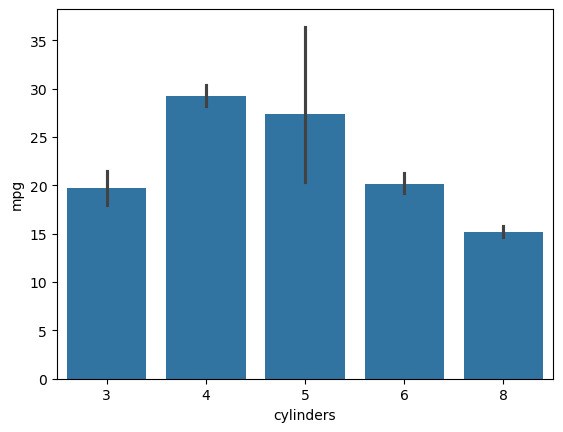

In [82]:
sns.barplot(x='cylinders', y='mpg', data=df)

7. What relation between cubic inches , number of cylinders and horse power you can observe from the data ?

Ans: Larger engines (higher cubic inches) with more cylinders tend to produce more horsepower.
However, efficiency varies, as some 4-cylinder engines (e.g., turbocharged ones) can still generate high horsepower.

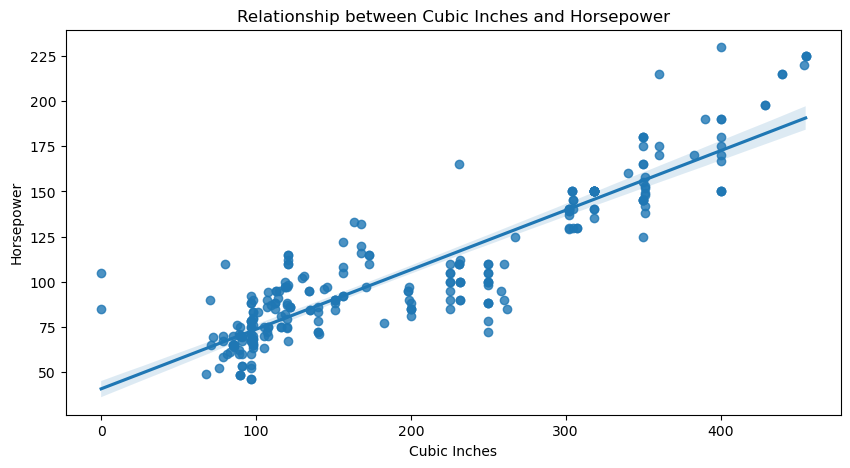

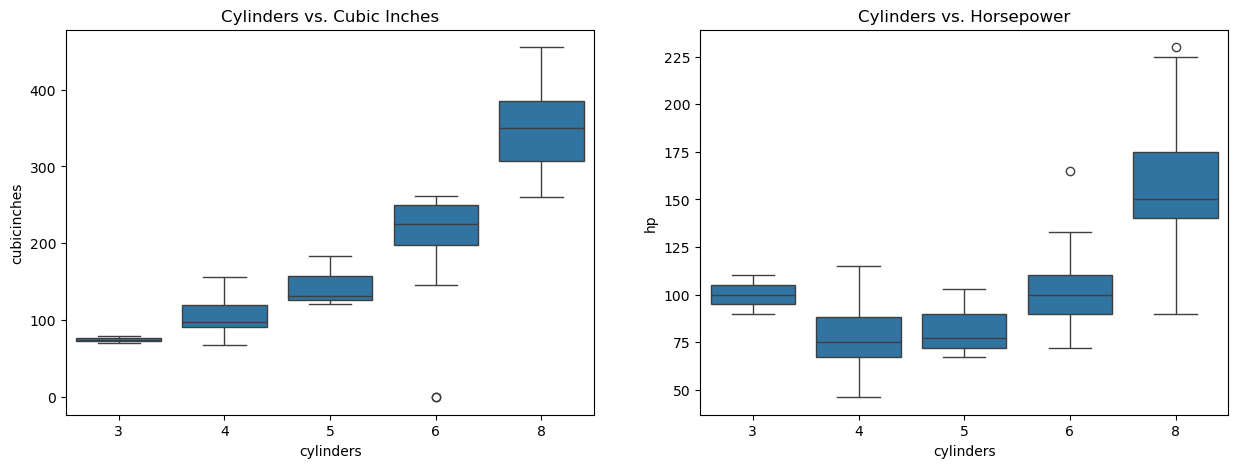

,cubicinches,cylinders,hp
cubicinches,1.000000,0.935793,0.898781
cylinders,0.935793,1.000000,0.845155
hp,0.898781,0.845155,1.000000


In [89]:
import seaborn as sns

# Scatter plot with regression line for cubic inches vs. horsepower
plt.figure(figsize=(10, 5))
sns.regplot(x=df['cubicinches'], y=df['hp'])
plt.xlabel("Cubic Inches")
plt.ylabel("Horsepower")
plt.title("Relationship between Cubic Inches and Horsepower")
plt.show()

# Boxplot of cylinders vs. cubic inches and horsepower
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['cylinders'], y=df['cubicinches'], ax=axes[0])
axes[0].set_title("Cylinders vs. Cubic Inches")

sns.boxplot(x=df['cylinders'], y=df['hp'], ax=axes[1])
axes[1].set_title("Cylinders vs. Horsepower")

plt.show()

# Compute correlation values
correlations = df[['cubicinches', 'cylinders', 'hp']].corr()
correlations


8. How much proportion of the total records is occupied by vehicles with 8 cylinders ?

Ans: 29.1% of total records are occupied by vehicles with 8 cylinders.

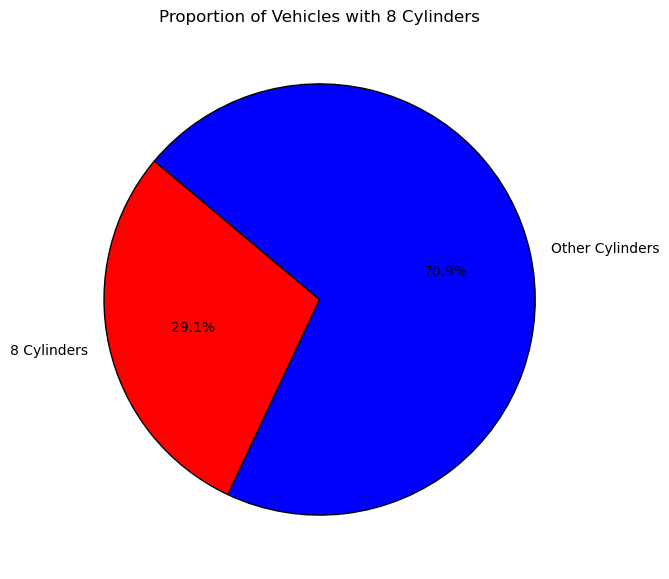

In [91]:
# Count vehicles with 8 cylinders
count_8_cylinders = df[df['cylinders'] == 8].shape[0]
total_records = df.shape[0]

# Count vehicles with other cylinders
count_other_cylinders = total_records - count_8_cylinders

# Pie chart data
sizes = [count_8_cylinders, count_other_cylinders]
labels = ['8 Cylinders', 'Other Cylinders']
colors = ['red', 'blue']

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Proportion of Vehicles with 8 Cylinders")
plt.show()

Car Data Summary 🚗📊

Engine Size, Cylinders, & Power
Larger engines (more cubic inches) usually have more horsepower. More cylinders (like V8) = bigger engines and higher power.

Cars with 8 Cylinders
Many cars in the dataset have 8-cylinder engines, as shown in a pie chart.

Key Takeaways
V8 engines are powerful but fuel-hungry. Smaller engines (4 or 6 cylinders) offer better fuel efficiency with less power. Heavier cars tend to have bigger engines.

What This Means
For power and speed, choose a V8 (expect higher fuel costs). For better gas mileage, go for a 4- or 6-cylinder. Modern cars are using smaller, turbocharged engines to balance both.